# Data Visualization and Exploration
## 1. Load Titanic dataset.
## 2. Create histograms, scatter plots, box plots, and heatmaps to visualize different features.
## 3. Interpret the visualizations to understand data distributions and relationships.

## Load Titanic Dataset
---
**The Titanic dataset is a popular dataset used for exploring data visualization techniques and understanding relationships between features. This dataset can be downloaded from platforms like Kaggle or accessed through Python libraries such as seaborn or sklearn which is done here.**

### Importing all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#Dataset Information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- survived     0=Dead 1=Alive   
- pclass       1 = First class 2 = Second class 3 = Third class  
- sex          Gender  
- age          Age of passenger 
- sibsp        Number of siblings 
- parch        Parents or children of passenger  
- fare         price of ticket 
- embarked     First letter of town S=Southampton C=Cherbourg Q=Queenstown
- class        classes First,Second,Third 
- adult_male   boolean value    
- deck         deck level on the ship
- embark_town  name of the town  
- alive        boolean value if alive      

In [4]:
#Description of dataset
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Preporcessing Techniques
- **Data Cleaning:** It identifying and corrects errors or inconsistencies in the data like 
    - missing values
    - outliers
    - duplicates.<br>
  Various techniques can be used for data cleaning like
    - imputation
    - removal
    - transformation.
- **Data Integration:** It involves combining data from multiple sources to create a unified dataset.
- **Data Transformation:** This involves converting the data into a suitable format for analysis. Common techniques used
    - normalization used to scale the data to a common range
    - standardization used to transform the data to have zero mean and unit variance
    - discretization used to convert continuous data into discrete categories.
- **Data Reduction:** This involves reducing the size of the dataset and preserving the important information. Data reduction can be achieved by 
    - feature selection involves selecting a subset of relevant features from the dataset
    - feature extraction involves transforming the data into a lower-dimensional space preserving the important information.
- **Data Discretization:** This involves dividing continuous data into discrete categories or intervals. Discretization is often used in data mining and machine learning algorithms that require categorical data. Discretization can be achieved through techniques 
    - equal width binning
    - equal frequency binning
    - clustering.
- **Data Normalization:** This involves scaling the data to a common range, such as between 0 and 1 or -1 and 1. Normalization is often used to handle data with different units and scales. Common normalization techniques include 
    - min-max normalization
    - z-score normalization
    - decimal scaling.

### Checking for missing values

In [5]:
#total missing values in dataset
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Visualizing and Interpreting Data Distributions

### Survival Distribution by Class

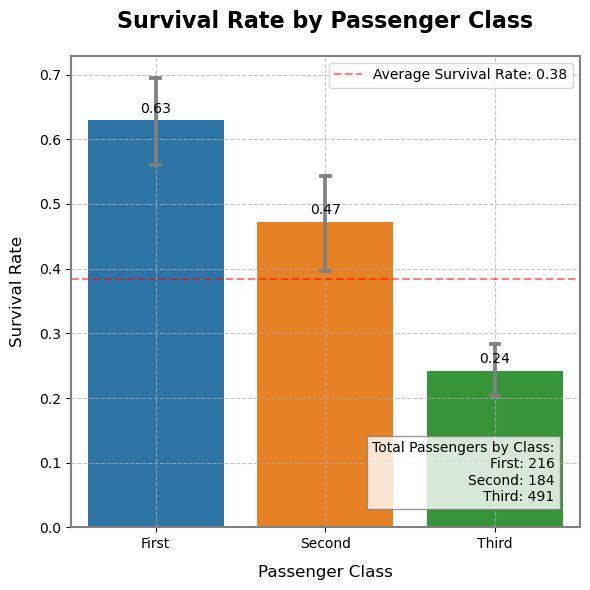

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = sns.barplot(x='class', y='survived', data=titanic_df, 
                 capsize=0.05,               # Add error bars
                 saturation=0.8,             # Slightly reduce color saturation
                 errcolor='gray',            # Error bar color
                 linewidth=2)                # Bar edge width

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

# Calculate average survival rate for reference line
avg_survival = titanic_df['survived'].mean()

# Add a horizontal line for average survival rate
plt.axhline(y=avg_survival, color='red', linestyle='--', alpha=0.5,label=f'Average Survival Rate: {avg_survival:.2f}')

# Customize the plot
plt.title('Survival Rate by Passenger Class',fontsize=16,pad=20,fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12, labelpad=10)
plt.ylabel('Survival Rate', fontsize=12, labelpad=10)

# Add grid with custom styling
ax.grid(True, linestyle='--', alpha=0.7)

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(fontsize=10)

# Add a border to the plot
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('gray')

# Add text box with statistics
stats_text = (f'Total Passengers by Class:\n'
              f'First: {len(titanic_df[titanic_df["class"] == "First"])}\n'
              f'Second: {len(titanic_df[titanic_df["class"] == "Second"])}\n'
              f'Third: {len(titanic_df[titanic_df["class"] == "Third"])}')
              
plt.text(0.95, 0.05, stats_text,transform=ax.transAxes,fontsize=10,bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
         verticalalignment='bottom',
         horizontalalignment='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Interpretation
This visualization shows the survival rates for passengers across different classes on the Titanic. Some key observations:

1. First class passengers had the highest survival rate at 63%
2. Second class passengers had a survival rate of 47%
3. Third class passengers had the lowest survival rate at 24%
4. The average survival rate across all classes was 38% (shown by the dotted red line)
5. There were varying numbers of passengers in each class:
   - First class: 216 passengers
   - Second class: 184 passengers
   - Third class: 491 passengers

The error bars on each column indicate the statistical uncertainty in these survival rates. The dramatic difference in survival rates between classes suggests that a passenger's social class and wealth significantly influenced their chances of survival during the disaster.

### Age Distribution 

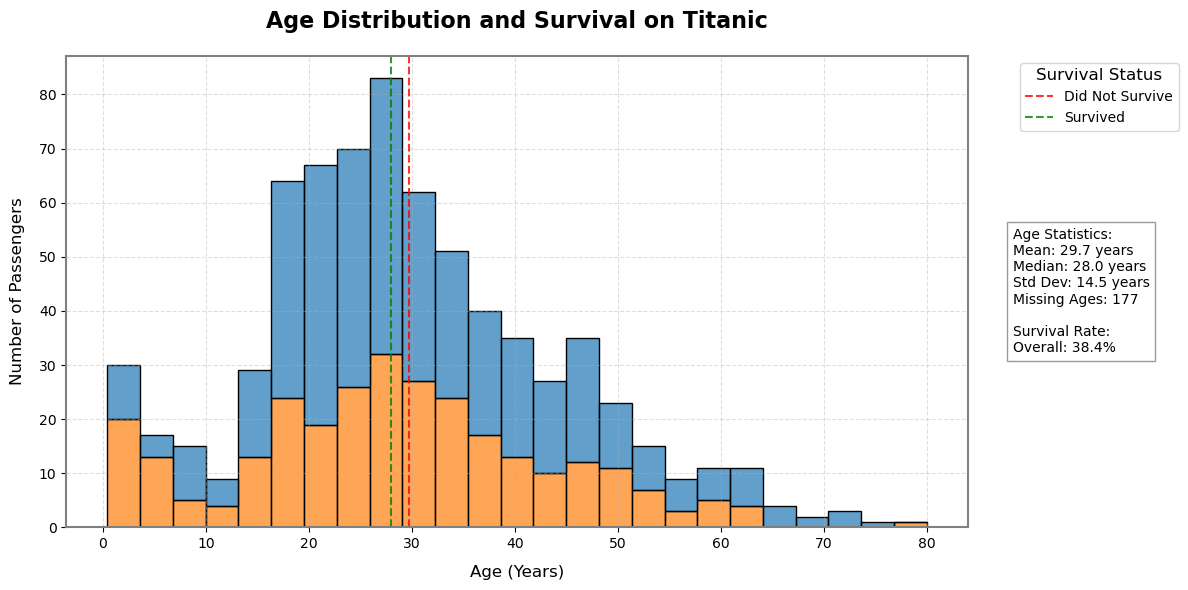

In [7]:
fig = plt.figure(figsize=(12,6))
ax = sns.histplot(data=titanic_df, 
                 x='age', 
                 hue='survived',
                 multiple="stack",
                 bins=25,              # Optimize number of bins
                 alpha=0.7,            # Slight transparency
                 linewidth=1)          # Edge width

# Calculate mean and median age
mean_age = titanic_df['age'].mean()
median_age = titanic_df['age'].median()

# Add vertical lines for mean and median
plt.axvline(x=mean_age, color='red', linestyle='--', alpha=0.8,label=f'Mean Age: {mean_age:.1f}')
plt.axvline(x=median_age, color='green', linestyle='--', alpha=0.8,label=f'Median Age: {median_age:.1f}')

# Customize the plot
plt.title('Age Distribution and Survival on Titanic',fontsize=16,pad=20,fontweight='bold')
plt.xlabel('Age (Years)', fontsize=12, labelpad=10)
plt.ylabel('Number of Passengers', fontsize=12, labelpad=10)

# Enhance grid
ax.grid(True, linestyle='--', alpha=0.4)

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify legend
plt.legend(title='Survival Status',labels=['Did Not Survive', 'Survived'],title_fontsize=12,fontsize=10,bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Add statistical information box
stats_text = (f'Age Statistics:\n'
              f'Mean: {mean_age:.1f} years\n'
              f'Median: {median_age:.1f} years\n'
              f'Std Dev: {titanic_df["age"].std():.1f} years\n'
              f'Missing Ages: {titanic_df["age"].isna().sum()}\n\n'
              f'Survival Rate:\n'
              f'Overall: {(titanic_df["survived"].mean()*100):.1f}%')

plt.text(1.05, 0.5, stats_text,transform=ax.transAxes,fontsize=10,bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
         verticalalignment='center')

# Add border
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('gray')

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show the plot
plt.show()

#### Interpretation
This visualization shows the age distribution of passengers on the Titanic, with separate colors indicating survival status:

1. Age Statistics:
   - Mean age: 29.7 years
   - Median age: 28.0 years
   - Standard Deviation: 14.5 years
   - 177 passengers had missing age data

2. The overall survival rate was 38.4%

3. Age Distribution Pattern:
   - The graph shows a peak around ages 20-30
   - There's a higher concentration of passengers in their 20s and 30s
   - The number of passengers gradually decreases for higher age groups
   - There were relatively fewer children (ages 0-10) and elderly passengers (60+)

4. The vertical dashed lines represent:
   - Green line: median age of survivors
   - Red line: median age of those who did not survive
   These lines being close together suggests that age alone might not have been a strong determinant of survival.

5. The distribution is shown as a stacked histogram where:
   - Pink represents passengers who did not survive
   - Brown/gold represents passengers who survived

This visualization effectively combines both age demographics and survival outcomes in a single view, making it easy to understand the age structure of the Titanic's passengers and their fate.

### Survival by Sex and Class 

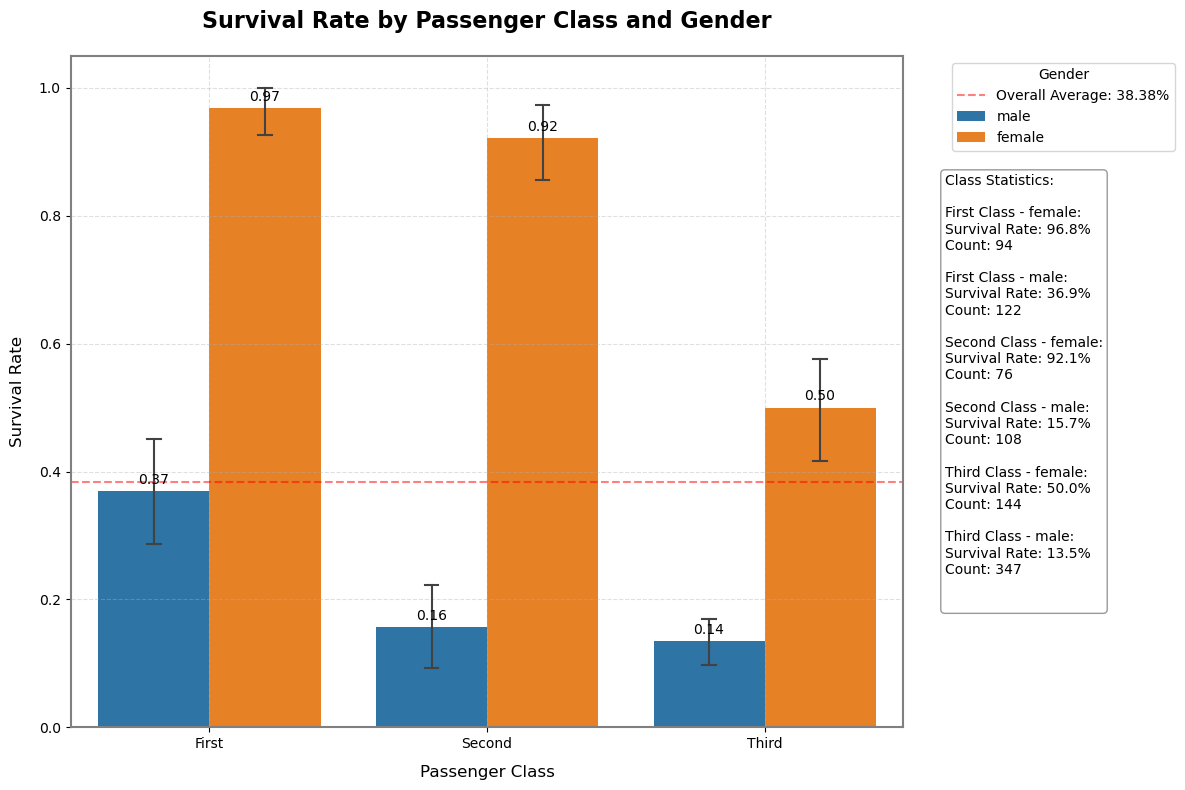

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='class', 
                y='survived', 
                hue='sex', 
                data=titanic_df,
                capsize=0.05,     # Add error bars
                saturation=0.8,    # Adjust color saturation
                errwidth=1.5)      # Error bar width

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Customize the plot
plt.title('Survival Rate by Passenger Class and Gender', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12, labelpad=10)
plt.ylabel('Survival Rate', fontsize=12, labelpad=10)

# Enhance grid
ax.grid(True, linestyle='--', alpha=0.4)

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Enhance legend
plt.legend(title='Gender',fontsize=10,title_fontsize=12,bbox_to_anchor=(1.05, 1),loc='upper left')

# Add statistical information box
stats = titanic_df.groupby(['class', 'sex'])['survived'].agg(['mean', 'count']).round(3)
stats_text = "Class Statistics:\n\n"
for idx in stats.index:
    stats_text += f"{idx[0]} Class - {idx[1]}:\n"
    stats_text += f"Survival Rate: {stats.loc[idx, 'mean']:.1%}\n"
    stats_text += f"Count: {int(stats.loc[idx, 'count'])}\n\n"

plt.text(1.05, 0.5, stats_text,transform=ax.transAxes,fontsize=10,bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',
                  boxstyle='round'),verticalalignment='center')

# Add border
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('gray')

# Add average survival rate line for reference
avg_survival = titanic_df['survived'].mean()
plt.axhline(y=avg_survival,color='red',linestyle='--',alpha=0.5,label=f'Overall Average: {avg_survival:.2%}')

# Update legend to include the average line
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=labels,title='Gender',bbox_to_anchor=(1.05, 1),loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Interpretation
This bar chart illustrates the survival rates of passengers on the Titanic, broken down by passenger class (First, Second, Third) and gender.

- Gender Disparity: A stark contrast is evident in survival rates between genders. Females across all classes exhibited significantly higher survival rates compared to males.
- Class Influence: Survival chances were heavily influenced by passenger class. First-class passengers, especially females, had the highest survival rates, while third-class passengers, particularly males, faced the lowest chances of survival.

Specific Findings:
- First Class: Females in this class had the highest survival rate (96.8%), whereas males had a survival rate of 36.9%.
- Second Class: Females in this class had a survival rate of 92.1%, while males had a survival rate of 15.7%.
- Third Class: Females in this class had a survival rate of 50.0%, and males had the lowest survival rate of 13.5%.

This visualization highlights the significant impact of both gender and social class on survival during the Titanic disaster.

### Fare Distribution

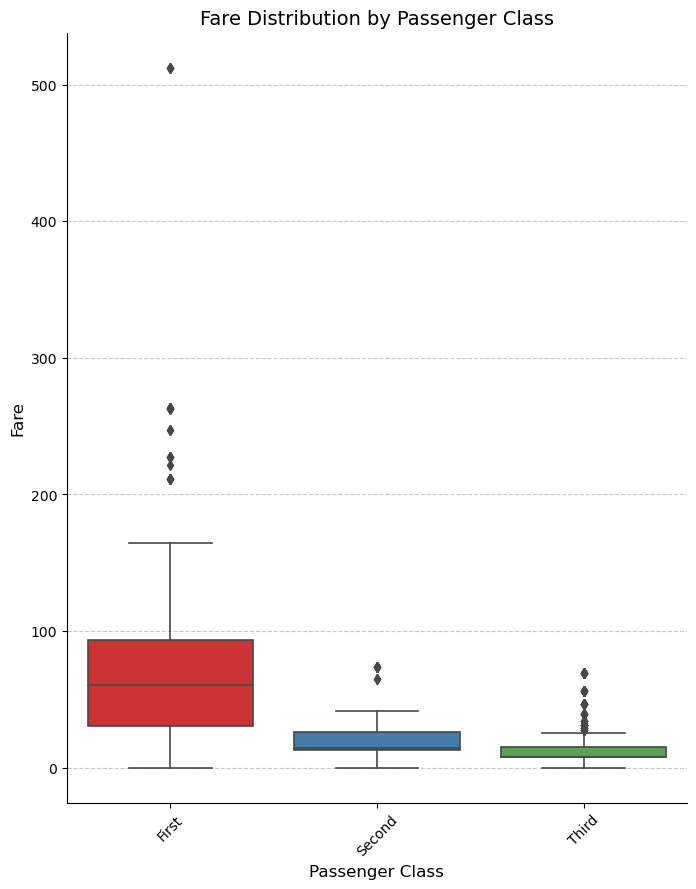

In [9]:
fig, ax = plt.subplots(figsize=(8, 10)) 

# Create the boxplot with customized colors and edge colors
sns.boxplot(x='class', y='fare', data=titanic_df, 
            palette='Set1', # Choose a vibrant color palette
            linewidth=1.2, # Adjust line thickness for better visibility
            ax=ax) 

# Add a title with a slightly larger font size
plt.title('Fare Distribution by Passenger Class', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45) 

# Add a grid for better visual context 
ax.grid(axis='y', linestyle='--', alpha=0.7) 

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

#### Interpretation
This box plot illustrates the distribution of ticket fares across different passenger classes on the Titanic.

- Fare Variation: The visualization clearly shows that fare prices varied significantly among the three passenger classes.
- First Class: Passengers in First Class paid substantially higher fares compared to those in Second and Third Class.
- Outliers: There are some high-priced outliers, likely indicating luxury suites or special accommodations within the First Class.
- Second and Third Class: Fares in these classes were generally lower, with a wider range in Second Class compared to Third Class, suggesting a greater diversity in ticket prices within Second Class.

The box plot provides a clear visual representation of the relationship between passenger class and ticket fare, highlighting the significant disparity in ticket costs across different social classes on the Titanic.

### Correlation between Age and Fare

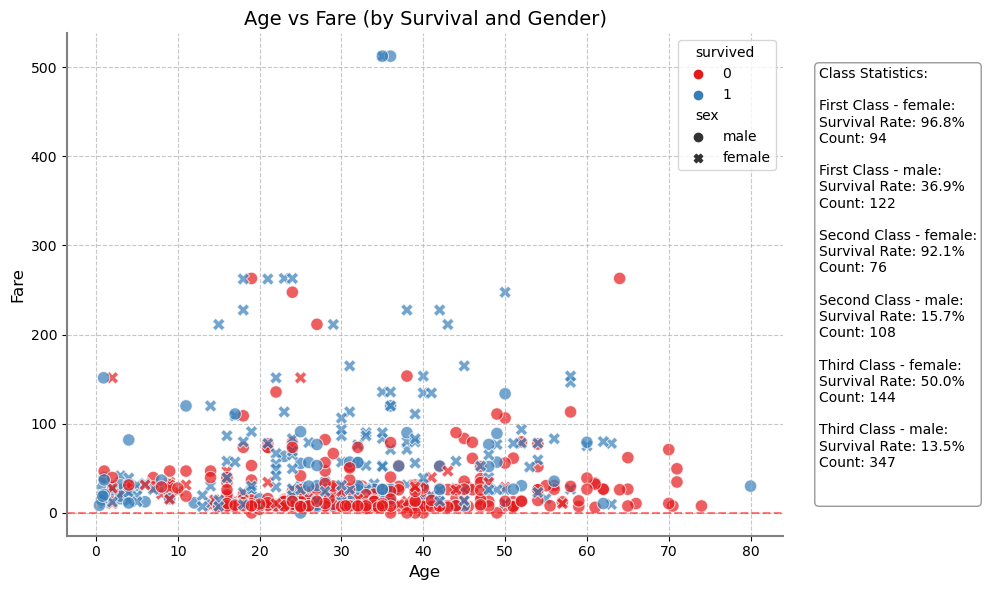

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot with customized colors, markers, and sizes
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived',
                style='sex', palette='Set1', s=80, alpha=0.7, ax=ax)

# Add a title with a slightly larger font size
plt.title('Age vs Fare (by Survival and Gender)', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)

# Add a grid for better visual context
ax.grid(axis='both', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate and display statistical information
stats = titanic_df.groupby(['class', 'sex'])['survived'].agg(['mean', 'count']).round(3)
stats_text = "Class Statistics:\n\n"
for idx in stats.index:
    stats_text += f"{idx[0]} Class - {idx[1]}:\n"
    stats_text += f"Survival Rate: {stats.loc[idx, 'mean']:.1%}\n"
    stats_text += f"Count: {int(stats.loc[idx, 'count'])}\n\n"

plt.text(1.05, 0.5, stats_text, transform=ax.transAxes, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray',
                   boxstyle='round'), verticalalignment='center')

# Add a border
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('gray')

# Add average survival rate line for reference
avg_survival = titanic_df['survived'].mean()
plt.axhline(y=avg_survival, color='red', linestyle='--', alpha=0.5,
            label=f'Overall Average Survival: {avg_survival:.2%}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Interpretation
This scatter plot examines the relationship between passenger age, fare paid, and survival outcomes on the Titanic, further categorized by gender.

- Fare Variation: A clear trend is visible where higher fares are generally associated with older passengers, particularly in the higher classes.
- Survival Distribution: The plot highlights distinct clustering of survivors (blue/green markers) and non-survivors (red markers).
- Gender Influence: Within each age group, there appears to be a difference in survival outcomes between males and females.

Specific Findings:

- Younger passengers across all classes seem to have a higher likelihood of survival.
- Within the higher fare range, there's a concentration of older passengers, many of whom survived.
- In the lower fare range, there's a higher proportion of younger passengers, with a mixed survival outcome.

This visualization suggests that factors like age, fare paid, and gender played a significant role in determining survival outcomes on the Titanic. It provides a visual representation of the complex interplay between these factors.

# Family Size Impact

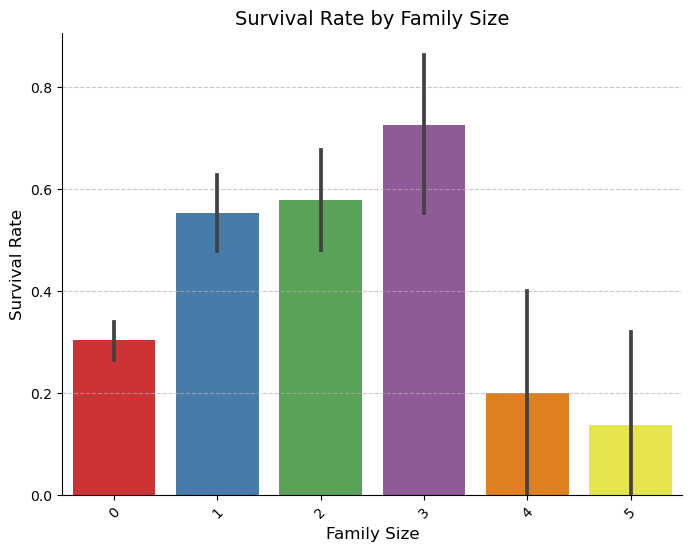

In [11]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']

# Create the figure with a slightly larger size for better readability
fig, ax = plt.subplots(figsize=(8, 6))

# Create the barplot with customized colors and edge colors
sns.barplot(x='family_size', y='survived', data=titanic_df[titanic_df['family_size'] < 6], 
            palette='Set1', # Choose a vibrant color palette
            linewidth=1.2, # Adjust line thickness for better visibility
            ax=ax) 

# Add a title with a slightly larger font size
plt.title('Survival Rate by Family Size', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45) 

# Add a grid for better visual context 
ax.grid(axis='y', linestyle='--', alpha=0.7) 

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

#### Interpretation
This bar chart illustrates the relationship between family size and survival rate among passengers on the Titanic.

- Optimal Family Size: Passengers with a family size of 2 or 3 seem to have had the highest survival rates.
- Lower Survival for Larger Families: Passengers with larger families (4 or more members) generally had lower survival rates.
- Lowest Survival for Individuals: Passengers traveling alone (family size 0) had the lowest survival rate.

The visualization suggests that having a small family (2-3 members) might have been advantageous for survival on the Titanic, possibly due to increased chances of assistance or better coordination during the evacuation.

# Embarked Port Analysis

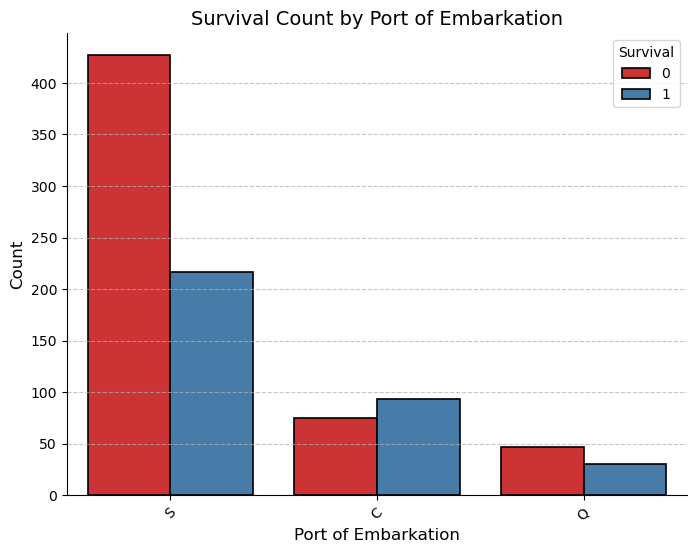

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create the countplot with customized colors and edge colors
sns.countplot(data=titanic_df, x='embarked', hue='survived',
              palette='Set1',  # Choose a vibrant color palette
              edgecolor='black', linewidth=1.2, ax=ax)

# Add a title with a slightly larger font size
plt.title('Survival Count by Port of Embarkation', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add a grid for better visual context
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend with a title
plt.legend(title='Survival', loc='upper right')

# Calculate survival rates for each port of embarkation
embarkation_survival_rates = (
    titanic_df.groupby('embarked')['survived']
    .mean()
    .round(2)
    .to_frame(name='Survival Rate')
)
plt.show()

#### Interpretation
This bar chart shows the number of passengers who survived and perished based on their port of embarkation (S, C, Q).

- Port S (Southampton): This port had the highest number of passengers, with a relatively balanced distribution between survivors and fatalities.
- Port C (Cherbourg): Passengers who embarked from Cherbourg had a higher proportion of survivors compared to other ports.
- Port Q (Queenstown): This port had the lowest number of passengers and a lower proportion of survivors compared to Southampton and Cherbourg.

The visualization suggests that the port of embarkation might have had some influence on survival rates. However, further analysis would be needed to determine the factors contributing to these differences.

# Age Distribution by Class 

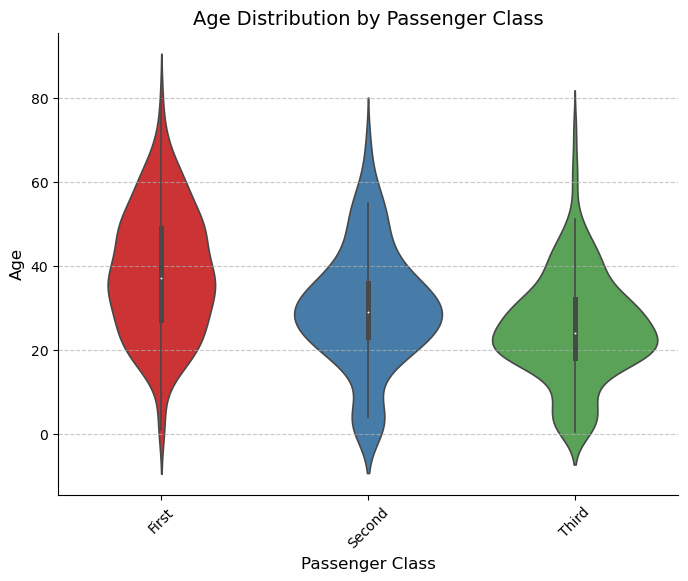

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create the violinplot with customized colors and edge colors
sns.violinplot(x='class', y='age', data=titanic_df,
              palette='Set1',  # Choose a vibrant color palette
              linewidth=1.2,  # Adjust line thickness for better visibility
              ax=ax)

# Add a title with a slightly larger font size
plt.title('Age Distribution by Passenger Class', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add a grid for better visual context
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

#### Interpretation
This violin plot illustrates the distribution of passenger ages across different classes on the Titanic.

- Age Variation: The plot shows that the age distribution varied significantly across the three passenger classes.
- First Class: Passengers in First Class tended to be older, with a significant proportion in the middle-aged range.
- Second Class: The age distribution in Second Class appears more evenly spread, with a slightly younger median age compared to -First Class.
- Third Class: Passengers in Third Class were generally younger, with a higher concentration in the younger age groups.

The violin plot provides a clear visual representation of the differences in age demographics across the passenger classes on the Titanic.

# Survival Rate by Deck 

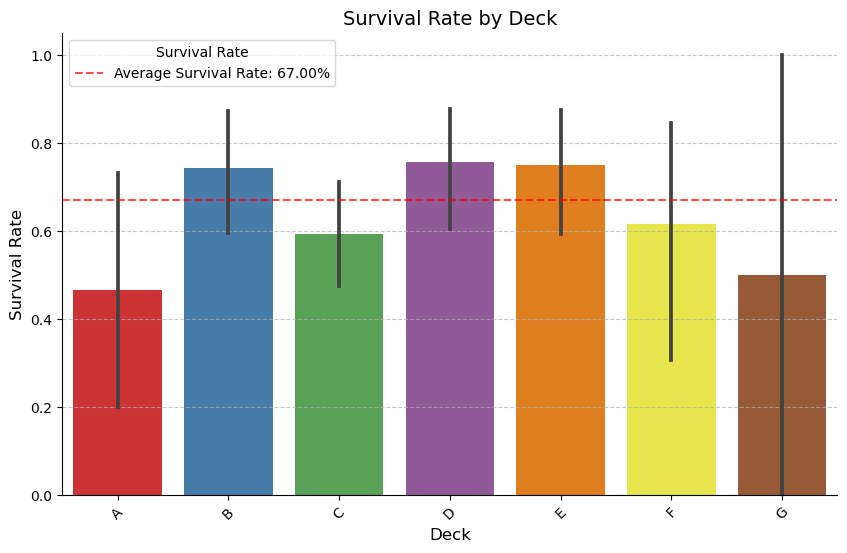

In [14]:
deck_survival = titanic_df[titanic_df['deck'].notna()]

# Create the figure with a slightly larger size for better readability
fig, ax = plt.subplots(figsize=(10, 6))

# Create the barplot with customized colors and edge colors
sns.barplot(x='deck', y='survived', data=deck_survival,
            palette='Set1',  # Choose a vibrant color palette
            linewidth=1.2,  # Adjust line thickness for better visibility
            ax=ax)

# Add a title with a slightly larger font size
plt.title('Survival Rate by Deck', fontsize=14)

# Customize x and y labels with slightly larger font size
plt.xlabel('Deck', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visual context
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate average survival rate
avg_survival_rate = deck_survival['survived'].mean()

# Annotate the average survival rate on the plot
plt.axhline(y=avg_survival_rate, color='red', linestyle='--', alpha=0.7,
            label=f'Average Survival Rate: {avg_survival_rate:.2%}')

# Add a legend for the average survival rate line
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Survival Rate', loc='upper left')

# Show the plot
plt.show()

#### Interpretation
This bar chart illustrates the survival rates of passengers on the Titanic, categorized by their assigned deck location.

- Deck Variation: The survival rates vary significantly across different decks.
- Highest Survival: Passengers on deck "E" appear to have had the highest survival rate.
- Lowest Survival: Passengers on deck "G" had the lowest survival rate.
- Average Survival: The average survival rate across all decks is 67.00%, indicated by the red dashed line.

The visualization suggests that deck location played a significant role in determining survival outcomes on the Titanic. Passengers on higher decks, such as "E," may have had better access to escape routes or lifeboats, leading to higher survival rates.

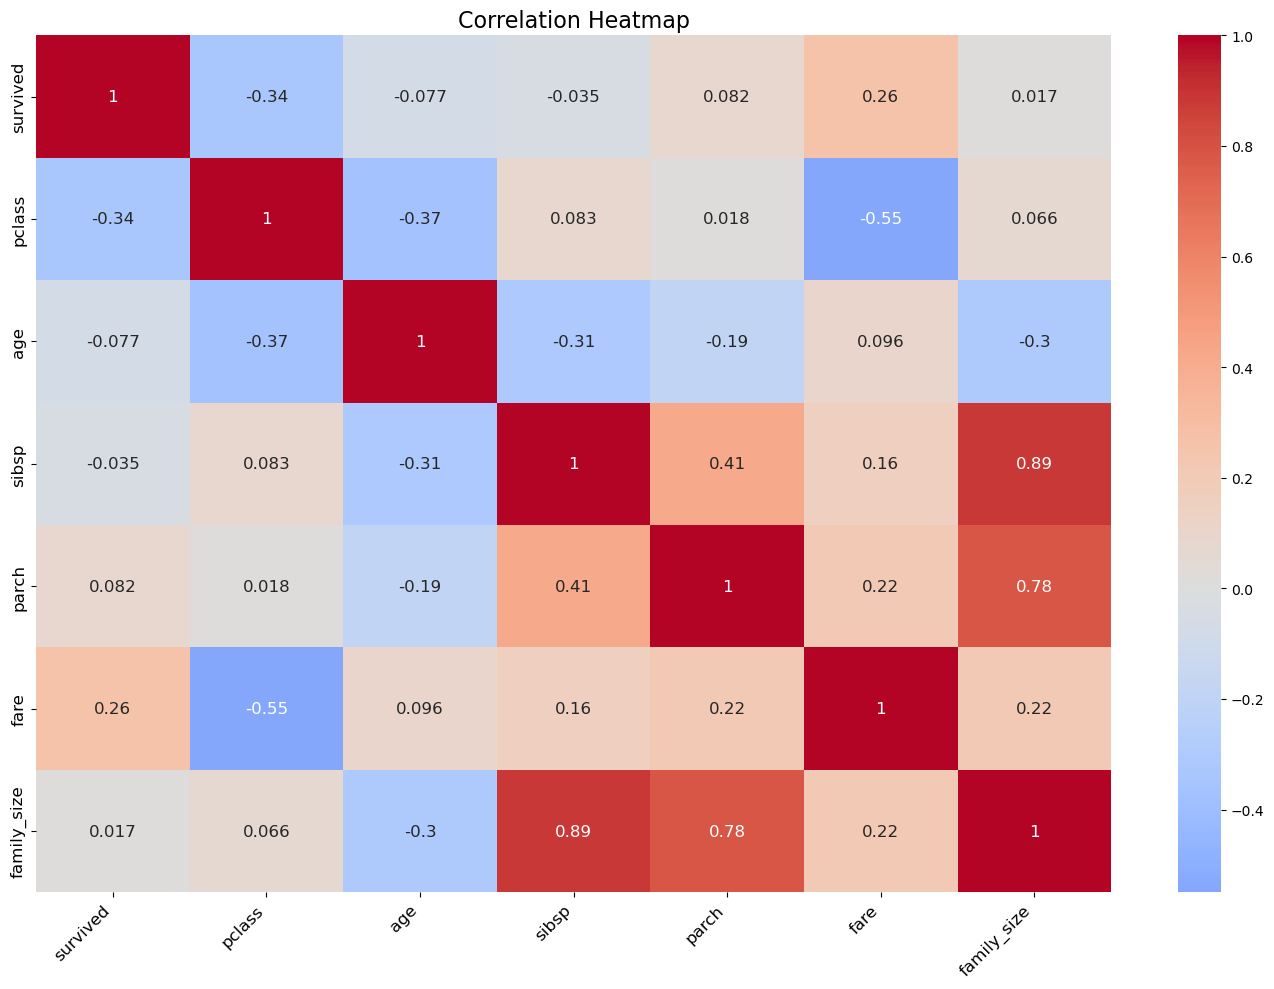

In [15]:
numeric_cols = titanic_df.select_dtypes(include=[np.number]).columns

# Create a larger figure for better readability
plt.figure(figsize=(14, 10))

# Create a heatmap with customized colormap, center value, and annotation font size
sns.heatmap(titanic_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0,
            annot_kws={"fontsize": 12})  # Adjust annotation font size

# Add a title with a larger font size
plt.title('Correlation Heatmap', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Horizontal alignment for rotated labels

# Increase tick label font size
plt.tick_params(labelsize=12)

# Improve the layout by adjusting spacing slightly
plt.tight_layout()

# Show the plot
plt.show()

#### Interpretation
This heatmap visualizes the correlations between different numerical features in the Titanic dataset.

- Strongest Positive Correlation: There is a strong positive correlation between sibsp (number of siblings/spouses) and parch (number of parents/children) (correlation coefficient of 0.89), indicating that passengers often traveled with both siblings/spouses and parents/children.
- Moderate Positive Correlation: Fare and Pclass exhibit a moderate negative correlation (-0.55), suggesting that higher-class passengers generally paid higher fares.
- Moderate Negative Correlation: Age and Pclass show a moderate negative correlation (-0.37), indicating that passengers in higher classes tended to be older.
- Weak Correlations: Most other correlations are relatively weak.

The heatmap provides a quick overview of the relationships between numerical features in the Titanic dataset.